## TRAINING A MODEL TO DETECT WHICH DIRECTION A CHARACTER IS FACING


# Creating a training dataset

Installing dependencies

In [ ]:
!pip install icrawler
!pip install pillow
!pip install tensorflow
!pip install matplotlib

Scrapping to download images for the dataset

In [ ]:
import os
import hashlib
from PIL import Image
from icrawler.builtin import BingImageCrawler
shutil.rmtree("dataset_raw/left", ignore_errors=True)
shutil.rmtree("dataset_raw/right", ignore_errors=True)
# Crear base
base_dir = "dataset_raw"
for label in ["left", "right"]:
    os.makedirs(base_dir + "/" + label, exist_ok=True)

# Función para descargar en subcarpeta única por query
def download_images(query, category, max_num=150):
    folder_name = query.replace(" ", "_").lower()
    target_dir = os.path.join(base_dir, category, folder_name)
    os.makedirs(target_dir, exist_ok=True)

    crawler = BingImageCrawler(storage={'root_dir': target_dir})
    crawler.crawl(keyword=query, max_num=max_num)

# Queries variadas
queries_left = [
    "video game sprite walking left",
    "person looking left",
    "2d character side profile facing left",
    "full body game figure looking left",
    "character left side view standing",
    "game character moving left",
    "cartoon avatar turned left",
    "isometric character walking left",
    "anime style sprite facing left"
]

queries_right = [
    "video game sprite walking right",
    "person looking right",
    "2d character side profile facing right",
    "full body game figure looking right",
    "character right side view standing",
    "game character moving right",
    "cartoon avatar turned right",
    "isometric character walking right",
    "anime style sprite facing right"
]

# Descargar con control de carpeta
for q in queries_left:
    print(f"Descargando LEFT: {q}")
    download_images(q, "left", max_num=150)

for q in queries_right:
    print(f"Descargando RIGHT: {q}")
    download_images(q, "right", max_num=150)

# Fusionar carpetas de subqueries en una sola (por clase)
import glob
import shutil

def flatten_and_deduplicate(source_root):
    final_dir = source_root
    temp_files = []
    seen_hashes = set()

    for subdir in os.listdir(source_root):
        subpath = os.path.join(source_root, subdir)
        if os.path.isdir(subpath):
            for file in glob.glob(os.path.join(subpath, "*")):
                try:
                    with Image.open(file) as img:
                        h = hashlib.sha1(img.tobytes()).hexdigest()
                        if h not in seen_hashes:
                            seen_hashes.add(h)
                            temp_files.append(file)
                except:
                    continue

    # Crear carpeta temporal unificada
    clean_dir = source_root + "_clean"
    os.makedirs(clean_dir, exist_ok=True)

    for i, f in enumerate(temp_files):
        ext = os.path.splitext(f)[1]
        shutil.copy(f, os.path.join(clean_dir, f"{i:06d}{ext}"))

    print(f"✅ {len(temp_files)} imágenes únicas copiadas a {clean_dir}")

# Limpiar y deduplicar ambas clases
flatten_and_deduplicate(os.path.join(base_dir, "left"))
flatten_and_deduplicate(os.path.join(base_dir, "right"))


Descargando LEFT: video game sprite walking left


ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/000/300/740/non_2x/game-sprite-actions-walking-vector.jpg
ERROR:downloader:Response status code 401, file https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/32a27301-95ac-4e1b-bcd9-19e587b3d60d/deqrc6q-3f029f04-494e-43c9-9f89-96bbc5a0b88a.gif/v1/fill/w_894,h_894,q_85,strp/sprite_walk_by_taemart_deqrc6q-pre.jpg
ERROR:downloader:Response status code 404, file https://www.shutterstock.com/image-vector/kyiv-ukraine-april-12-2023-600w-2288183539.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/thumbnails/003/423/733/small_2x/character-sprite-sheet-with-walk-cycle-and-run-cycle-sequence-vector.jpg
ERROR:downloader:Response status code 403, file https://p7.hiclipart.com/preview/419/992/838/walk-cycle-animation-pixel-art-sprite-walking-animation.jpg
ERROR:downloader:Response status code 401, file https://images-wixmp-ed30a86b8c4ca887773594

Descargando LEFT: person looking left


ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/004/544/605/large_2x/exhausted-man-looking-left-isolated-on-white-photo.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/004/544/611/non_2x/tired-man-looking-on-the-left-side-photo.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/011/809/578/non_2x/excited-and-surprised-young-happy-woman-astonished-pointing-looking-left-side-blank-space-for-your-promo-standing-white-background-fascinated-photo.jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/1226403468/photo/behind-of-young-confident-handsome-red-hair-man-walking-away-and-looking-at-side-with-hands.jpg
ERROR:downloader:Response status code 403, file https://c.stocksy.com/a/jXj700/z9/1843367.jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/498783873/phot

Descargando LEFT: 2d character side profile facing left


ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/015/917/195/non_2x/young-man-cartoon-character-front-and-side-view-free-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/thumbnails/005/273/295/small_2x/cartoon-character-with-business-man-in-a-smart-suit-for-animation-front-side-back-3-4-view-animated-character-flat-illustration-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/021/842/428/original/male-face-in-profile-asian-guy-s-head-side-view-avatar-for-a-social-network-flat-illustration-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/thumbnails/005/273/260/small_2x/cartoon-character-with-business-man-front-side-back-3-4-view-animated-character-flat-illustration-vector.jpg
ERROR:downloader:Response status code 401, file https://images-wixmp-ed30a86b8c4ca8877735

Descargando LEFT: full body game figure looking left


ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/022/816/660/non_2x/golden-pumpkin-ninja-full-body-game-character-design-ai-generated-content-photo.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/022/816/649/non_2x/golden-owl-ninja-full-body-game-character-design-ai-generated-content-photo.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/022/816/654/non_2x/golden-mantis-ninja-full-body-game-character-design-photo.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/022/816/657/non_2x/golden-pumpkin-ninja-full-body-game-character-design-ai-generated-content-photo.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/022/816/656/non_2x/golden-owl-ninja-full-body-game-character-design-photo.jpg
ERROR:downloader:Response 

Descargando LEFT: character left side view standing


ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/002/637/531/non_2x/woman-character-standing-side-view-on-white-background-free-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/008/572/887/non_2x/man-walking-character-isolated-on-white-background-side-view-illustration-with-free-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/020/118/314/original/cartoon-all-angle-character-design-for-animation-pro-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/thumbnails/005/273/331/small_2x/cartoon-character-with-a-man-in-t-shirt-white-casual-for-animation-front-side-back-3-4-view-character-set-of-male-head-and-flat-illustration-vector.jpg
ERROR:downloader:Response status code 502, file https://c8.alamy.com/comp/2E8W273/woman-character-standing-side-view-on-white-ba

Descargando LEFT: game character moving left


ERROR:downloader:Response status code 403, file https://images.creativemarket.com/0.1.0/ps/12506628/3640/2410/m1/fpnw/wm1/220405blackman002-.jpg
ERROR:downloader:Response status code 403, file https://docs.unrealengine.com/4.26/Images/InteractiveExperiences/Networking/CharacterMovementComponent/CharacterMovement_Teleport.jpg
ERROR:downloader:Response status code 403, file https://coal.gamemaker.io/sites/5d75794b3c84c70006700381/assets/643959e00b3b93001a78b11f/vis_3.jpg
ERROR:downloader:Response status code 404, file https://www.wikihow.com/images/thumb/0/0a/Make-a-Character-Move-Step-1-Version-3.jpg
ERROR:downloader:Response status code 403, file https://images.creativemarket.com/0.1.0/ps/12506627/3640/2410/m1/fpnw/wm1/220405blackman001-.jpg
ERROR:downloader:Response status code 403, file https://docs.unrealengine.com/4.26/Images/InteractiveExperiences/Networking/CharacterMovementComponent/CharacterMovement_CustomMovementModeBP.jpg
ERROR:downloader:Response status code 404, file https:

Descargando LEFT: cartoon avatar turned left


ERROR:downloader:Response status code 401, file https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/41472720-a07e-4e61-9354-be0c54d6340c/dimrhsq-fca34fa8-0b21-4967-b1de-71f9db77195d.png/v1/fill/w_1280,h_813,q_80,strp/lefty_growing_evolution_by_2001gamer_dimrhsq-fullview.jpg
ERROR:downloader:Response status code 403, file https://www.researchgate.net/profile/Gavin-Baxter/publication/291147557/figure/fig1/AS:668905949368322@1536491014889/Examples-of-Avatar-Appearance-Cartoon-left-and-Realistic-right_Q320.jpg
ERROR:downloader:Response status code 401, file https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/82c98dd0-0ae7-4d84-9938-b567c74bf119/d7uc0xl-fbeda2cb-517c-4c5e-bd19-c92d95b39e18.jpg
ERROR:downloader:Response status code 401, file https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/57acc097-0b0c-4931-b5f6-de2d71e2667d/dj9cb5c-d984a5ca-7d50-494a-a72f-58e82b99308b.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previ

Descargando LEFT: isometric character walking left


ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/010/367/000/non_2x/walking-people-isometric-big-set-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/010/596/570/non_2x/isometric-character-male-illustration-design-free-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/000/987/953/original/isometric-people-character-set-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/007/928/613/non_2x/isometric-student-character-collection-free-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/005/338/197/original/set-packet-isometric-character-from-front-and-back-vector.jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/1305344430/vector/isometric-different-people-w

Descargando LEFT: anime style sprite facing left


ERROR:downloader:Response status code 404, file https://imgcdn.stablediffusionweb.com/2024/12/4/20377e0e-c1c4-4502-9988-f92777a67191.jpg
ERROR:downloader:Response status code 403, file https://p1.hiclipart.com/preview/720/413/197/my-favorite-rf3-sprites-anime-characters-collage-png-clipart.jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/1222940633/vector/set-of-emotions-sprite-full-length-character-for-game-visual-novel-anime-manga-girl-cartoon.jpg
ERROR:downloader:Response status code 401, file https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/16eda607-9c06-43e7-80d4-ec3118cac410/d8qs0y-dd5ce9ca-2e2a-45a8-8b05-bb94b58f6316.png/v1/fill/w_250,h_167,q_80,strp/anime_sprites_by_hikaruishino_d8qs0y-fullview.jpg
ERROR:downloader:Response status code 401, file https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/3237cf0c-591d-4343-8ccd-19fdb3038468/ddyqyjj-d0af6fb4-bc52-4180-ae56-92cf1bf3d723.jpg


Descargando RIGHT: video game sprite walking right


ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/000/300/740/non_2x/game-sprite-actions-walking-vector.jpg
ERROR:downloader:Response status code 401, file https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/32a27301-95ac-4e1b-bcd9-19e587b3d60d/deqrc6q-3f029f04-494e-43c9-9f89-96bbc5a0b88a.gif/v1/fill/w_894,h_894,q_85,strp/sprite_walk_by_taemart_deqrc6q-pre.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/thumbnails/003/423/733/small_2x/character-sprite-sheet-with-walk-cycle-and-run-cycle-sequence-vector.jpg
ERROR:downloader:Response status code 403, file https://preview.redd.it/first-pixel-sprite-walking-animation-tips-v0-a83p04k01yga1.jpg
ERROR:downloader:Response status code 403, file https://im.pnghero.com/3/21/7/png_preview/sprite-walk-cycle-pixel-art-mario-luigi-superstar-saga-bowser-video-games.jpg
ERROR:downloader:Response status code 401, file https://images-wixmp-ed30a86b8

Descargando RIGHT: person looking right


ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/016/243/015/large_2x/closeup-face-of-asian-man-looking-right-side-feel-excited-at-his-face-on-white-background-photo.jpg
ERROR:downloader:Response status code 400, file https://media.gettyimages.com/id/522998622/photo/man-looking-right.jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/97501709/photo/young-male-looking-right.jpg
ERROR:downloader:Response status code 400, file https://media.gettyimages.com/id/pha230000004/photo/woman-looking-right-portrait.jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/92692911/photo/man-looking-right.jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/481653996/photo/portrait-of-thoughtful-young-man-looking-right.jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/172398935/photo/woman-looking-right.jpg
ERROR:downloa

Descargando RIGHT: 2d character side profile facing right


ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/015/917/195/original/young-man-cartoon-character-front-and-side-view-free-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/thumbnails/012/905/122/small_2x/standing-man-and-his-face-with-different-emotions-free-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/thumbnails/005/273/260/small_2x/cartoon-character-with-business-man-front-side-back-3-4-view-animated-character-flat-illustration-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/thumbnails/005/273/295/small_2x/cartoon-character-with-business-man-in-a-smart-suit-for-animation-front-side-back-3-4-view-animated-character-flat-illustration-vector.jpg
ERROR:downloader:Response status code 404, file https://imgcdn.stablediffusionweb.com/2024/4/13/e7e720b6-e3e3-48f3-a0cf-cd81

Descargando RIGHT: full body game figure looking right


ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/022/816/660/non_2x/golden-pumpkin-ninja-full-body-game-character-design-ai-generated-content-photo.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/022/816/658/non_2x/golden-owl-ninja-full-body-game-character-design-ai-generated-content-photo.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/022/816/649/non_2x/golden-owl-ninja-full-body-game-character-design-ai-generated-content-photo.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/022/816/656/non_2x/golden-owl-ninja-full-body-game-character-design-photo.jpg


Descargando RIGHT: character right side view standing


ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/002/637/531/non_2x/woman-character-standing-side-view-on-white-background-free-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/020/118/314/original/cartoon-all-angle-character-design-for-animation-pro-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/015/917/195/original/young-man-cartoon-character-front-and-side-view-free-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/thumbnails/005/273/295/small_2x/cartoon-character-with-business-man-in-a-smart-suit-for-animation-front-side-back-3-4-view-animated-character-flat-illustration-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/thumbnails/005/273/260/small_2x/cartoon-character-with-business-man-front-sid

Descargando RIGHT: game character moving right


ERROR:downloader:Response status code 403, file https://ue-cdn.artstation.com/imgproxy/MolvCl6IHPKE0eC8F1dJoqleHi9bcGyiA7OAjtPvA0s/filename:ezgif.com-gif-maker.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/thumbnails/010/066/975/small_2x/education-game-for-children-match-by-direction-left-right-up-or-down-orientation-of-cute-cartoon-dracula-boy-character-halloween-printable-worksheet-vector.jpg
ERROR:downloader:Response status code 403, file https://images.creativemarket.com/0.1.0/ps/12506628/3640/2410/m1/fpnw/wm1/220405blackman002-.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/011/431/461/original/animator-working-on-character-movement-designing-frames-of-walking-computer-animation-cartoon-video-creation-make-your-story-alive-concept-flat-modern-illustration-vector.jpg


Descargando RIGHT: cartoon avatar turned right


ERROR:downloader:Response status code 403, file https://www.researchgate.net/publication/291147557/figure/fig1/AS:668905949368322@1536491014889/Examples-of-Avatar-Appearance-Cartoon-left-and-Realistic-right.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/012/941/604/non_2x/cartoon-little-boy-pointing-to-his-right-with-the-right-word-vector.jpg
ERROR:downloader:Response status code 403, file https://www.researchgate.net/profile/Gavin-Baxter/publication/291147557/figure/fig1/AS:668905949368322@1536491014889/Examples-of-Avatar-Appearance-Cartoon-left-and-Realistic-right_Q640.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/001/503/756/original/boy-face-avatar-cartoon-free-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/025/277/262/original/handsome-indian-man-semi-flat-character-head-editable-cartoon-avatar-icon

Descargando RIGHT: isometric character walking right


ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/010/367/000/non_2x/walking-people-isometric-big-set-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/000/987/953/original/isometric-people-character-set-vector.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/007/928/613/non_2x/isometric-student-character-collection-free-vector.jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/1324691098/vector/isometric-walking-businessman-character-design-in-different-poses.jpg
ERROR:downloader:Response status code 400, file https://media.gettyimages.com/id/1268138472/vector/isometric-set-of-movements-and-poses-of-a-businessman-and-businesswoman.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/010/596/570/original/isometric-character-male-il

Descargando RIGHT: anime style sprite facing right


ERROR:downloader:Response status code 404, file https://imgcdn.stablediffusionweb.com/2024/12/4/20377e0e-c1c4-4502-9988-f92777a67191.jpg
ERROR:downloader:Response status code 401, file https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/a737704e-a288-428e-80fd-19d2dd9eb910/da1hlvq-7c8d378b-4a93-48c6-a43b-451e0de02cf1.png/v1/fill/w_774,h_1033,q_70,strp/anime_sprite_by_skyscraper_dreamer_da1hlvq-pre.jpg
ERROR:downloader:Response status code 401, file https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/3237cf0c-591d-4343-8ccd-19fdb3038468/ddyqyjj-d0af6fb4-bc52-4180-ae56-92cf1bf3d723.jpg
ERROR:downloader:Response status code 403, file https://p1.hiclipart.com/preview/720/413/197/my-favorite-rf3-sprites-anime-characters-collage-png-clipart.jpg
ERROR:downloader:Response status code 401, file https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/a2a28c23-41f0-4f07-b072-97c891e77c4d/dakg01x-7bd93e6f-9ea1-46c3-93be-e201c5f7cb14.png/v1/fill/w_1600,h_938,q_80,strp/style_challenge_

✅ 772 imágenes únicas copiadas a dataset_raw/left_clean
✅ 820 imágenes únicas copiadas a dataset_raw/right_clean


Download dirty dataset for manual cleaning

In [ ]:
!mkdir -p dataset_final  # Crea carpeta si no existe
!mv dataset_raw/left_clean dataset_final/left
!mv dataset_raw/right_clean dataset_final/right

In [ ]:
import shutil

# Comprime toda la carpeta final
shutil.make_archive("dataset_final", "zip", "dataset_final")
from google.colab import files
files.download("dataset_final.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Remove the dataset images

In [45]:
import os
import glob

# Ruta base del dataset
dataset_dir = "dataset"

# Subcarpetas a limpiar
subdirs = ["left", "right"]

# Eliminar todas las imágenes dentro de las carpetas
for subdir in subdirs:
    path = os.path.join(dataset_dir, subdir, "*")
    files = glob.glob(path)
    for file in files:
        os.remove(file)

Fliping the images to obtain the left class from the right class

In [1]:
from PIL import Image, ImageOps
import os

# Definir carpetas
input_dir = "dataset/right"
output_dir = "dataset/left"

# Crear carpeta de salida si no existe
os.makedirs(output_dir, exist_ok=True)

print(f"Volteando imágenes de '{input_dir}' a '{output_dir}'...")

# Voltear cada imagen, conservando la transparencia
for fname in os.listdir(input_dir):
    # Ignorar archivos ocultos del sistema
    if fname.startswith('.'):
        continue

    try:
        # 1. Abrir la imagen y convertirla a RGBA para asegurar el canal alpha
        img = Image.open(os.path.join(input_dir, fname)).convert("RGBA")

        # Voltear la imagen horizontalmente
        flipped = ImageOps.mirror(img)

        # 2. Guardar en formato PNG para mantener la transparencia
        #    Extraemos el nombre base para cambiar la extensión a .png
        base_name = os.path.splitext(fname)[0]
        output_path = os.path.join(output_dir, f"flipped_{base_name}.png")

        flipped.save(output_path)

    except Exception as e:
        print(f"⚠️ Error procesando '{fname}': {e}. Archivo saltado.")

print("\n✅ Proceso completado.")

Volteando imágenes de 'dataset/right' a 'dataset/left'...

✅ Proceso completado.


Show Random images from each class

📸 Ejemplos de clase: LEFT


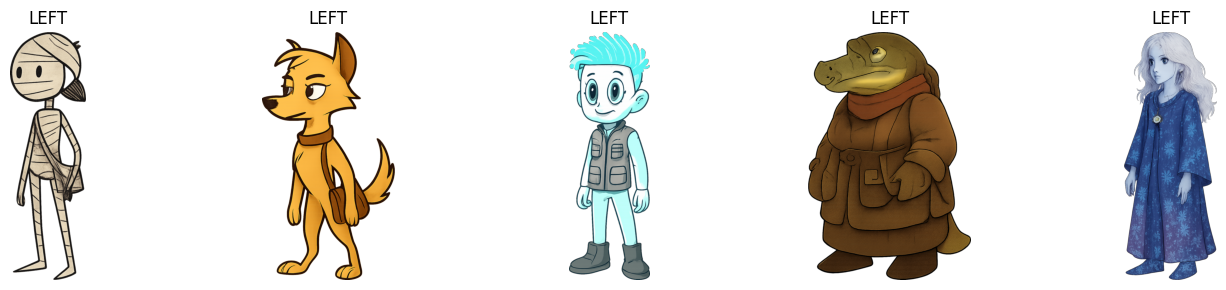

📸 Ejemplos de clase: RIGHT


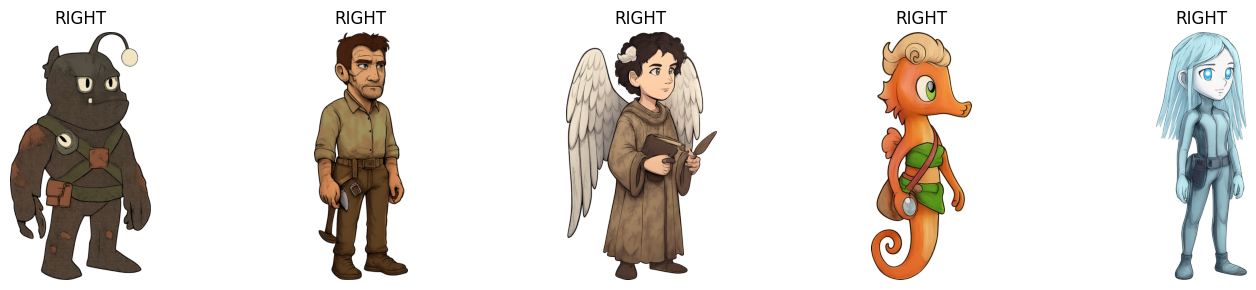

In [2]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def show_random_images(folder, label, num_images=5):
    image_paths = os.listdir(folder)
    sample_paths = random.sample(image_paths, min(num_images, len(image_paths)))

    plt.figure(figsize=(15, 3))
    for i, img_name in enumerate(sample_paths):
        img_path = os.path.join(folder, img_name)
        try:
            img = Image.open(img_path)
            plt.subplot(1, num_images, i+1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(label)
        except:
            print(f"Error al abrir: {img_path}")
    plt.tight_layout()
    plt.show()

# Rutas
left_folder = "dataset/left"
right_folder = "dataset/right"

# Mostrar imágenes aleatorias
print("📸 Ejemplos de clase: LEFT")
show_random_images(left_folder, "LEFT", num_images=5)

print("📸 Ejemplos de clase: RIGHT")
show_random_images(right_folder, "RIGHT", num_images=5)

# Training the model

Entrenar tiny cnn

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping # Importamos EarlyStopping
import os
import shutil

# 🔧 Configuración
img_size = (220, 300)
batch_size = 32
dataset_dir = "dataset"

# ✅ Cargar datasets (Sin cambios)
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir, image_size=img_size, validation_split=0.1, subset="training", seed=42, label_mode="binary", batch_size=batch_size, color_mode="rgba"
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir, image_size=img_size, validation_split=0.1, subset="validation", seed=42, label_mode="binary", batch_size=batch_size, color_mode="rgba"
)

# ✅ Data Augmentation Sutil
# Ahora sí ayudará a generalizar y a prevenir el sobreajuste
data_augmentation = models.Sequential([
    # --- Transformaciones Geométricas (posición, ángulo, zoom) ---
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomZoom(height_factor=0.1),

    # --- Transformaciones de Color (luz, contraste, tono) ---
    layers.RandomBrightness(factor=0.15),


], name="data_augmentation")

# ✅ Modelo Final y Optimizado
model = models.Sequential([
    layers.Input(shape=(img_size[0], img_size[1], 4)),
    data_augmentation, # Aplicamos la aumentación
    layers.Rescaling(1./255), # Movemos el reescalado al modelo

    # Tu arquitectura probada
    layers.Conv2D(32, (5, 5), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# ✅ Compilar (Sin cambios)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# ✅ Callback para detener el entrenamiento en el momento justo
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10, # Espera 10 épocas sin mejora antes de parar
    restore_best_weights=True # Se queda con los pesos del mejor modelo
)

# ✅ Entrenar de forma inteligente
history = model.fit(
    train_ds.map(lambda x, y: (x, y)), # Mapeo sin preprocesado manual
    validation_data=val_ds.map(lambda x, y: (x, y)),
    epochs=150, # Ponemos muchas épocas, EarlyStopping se encargará de parar
    callbacks=[early_stopping_callback]
)

# 💾 Guardar el mejor modelo encontrado
model.save("facing_direction_model_FINAL.keras")
print("\n✅ Mejor modelo guardado como 'facing_direction_model_FINAL.keras'")

Found 356 files belonging to 2 classes.
Using 321 files for training.
Found 356 files belonging to 2 classes.
Using 35 files for validation.
Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 890ms/step - accuracy: 0.5077 - loss: 0.6947 - val_accuracy: 0.7143 - val_loss: 0.6596
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 822ms/step - accuracy: 0.5157 - loss: 0.6897 - val_accuracy: 0.6857 - val_loss: 0.6506
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 839ms/step - accuracy: 0.5995 - loss: 0.6731 - val_accuracy: 0.6286 - val_loss: 0.6394
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 700ms/step - accuracy: 0.5293 - loss: 0.7023 - val_accuracy: 0.6000 - val_loss: 0.6521
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 714ms/step - accuracy: 0.6479 - loss: 0.6618 - val_accuracy: 0.7429 - val_loss: 0.6306
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 649ms/step - accuracy: 0.6163 - loss: 0.6689 - val_accuracy: 0.7714 - val_loss: 0.6195
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 757ms/step - accuracy: 0.5819 - loss:

Download model

In [12]:
from google.colab import files
files.download("facing_direction_model_FINAL.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# TEST

Remove test images

In [49]:
import os
import glob

# Ruta base del dataset
test_dir = "test"

# Subcarpetas a limpiar
subdirs = ["left", "right"]

# Eliminar todas las imágenes dentro de las carpetas
for subdir in subdirs:
    path = os.path.join(test_dir, subdir, "*")
    files = glob.glob(path)
    for file in files:
        os.remove(file)

Flip test folder images

In [14]:
from PIL import Image, ImageOps
import os

# Definir carpetas
input_dir = "test/right"
output_dir = "test/left"

# Crear carpeta de salida si no existe
os.makedirs(output_dir, exist_ok=True)

print(f"Volteando imágenes de '{input_dir}' a '{output_dir}'...")

# Voltear cada imagen, conservando la transparencia
for fname in os.listdir(input_dir):
    # Ignorar archivos ocultos del sistema
    if fname.startswith('.'):
        continue

    try:
        # 1. Abrir la imagen y convertirla a RGBA para asegurar el canal alpha
        img = Image.open(os.path.join(input_dir, fname)).convert("RGBA")

        # Voltear la imagen horizontalmente
        flipped = ImageOps.mirror(img)

        # 2. Guardar en formato PNG para mantener la transparencia
        #    Extraemos el nombre base para cambiar la extensión a .png
        base_name = os.path.splitext(fname)[0]
        output_path = os.path.join(output_dir, f"flipped_{base_name}.png")

        flipped.save(output_path)

    except Exception as e:
        print(f"⚠️ Error procesando '{fname}': {e}. Archivo saltado.")

print("\n✅ Proceso completado.")

Volteando imágenes de 'test/right' a 'test/left'...

✅ Proceso completado.


Classify images from test folder, show errors

In [15]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt # Importamos la librería para mostrar imágenes
import matplotlib.image as mpimg # Importamos la librería para leer imágenes

# --- CONFIGURACIÓN ---
model_path = "facing_direction_model_FINAL.keras"
test_dir = "test"
img_size = (220, 300)
batch_size = 32

# --- VERIFICACIÓN ---
if not os.path.exists(model_path):
    print(f"⚠️ Error: No se encontró el archivo del modelo en '{model_path}'")
    exit()
if not os.path.exists(test_dir):
    print(f"⚠️ Error: No se encontró el directorio de test en '{test_dir}'")
    exit()

# --- 1. CARGAR MODELO Y DATOS ---
print(f"Cargando modelo desde '{model_path}'...")
model = tf.keras.models.load_model(model_path)

print(f"Cargando datos de test desde '{test_dir}'...")
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, image_size=img_size, label_mode="binary", batch_size=batch_size, shuffle=False, color_mode="rgba"
)

class_names = test_ds.class_names
file_paths = test_ds.file_paths
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# --- 2. EVALUAR Y PREDECIR ---
print("\nEvaluando el modelo...")
results = model.evaluate(test_ds, verbose=0)
predictions = model.predict(test_ds, verbose=0)

predicted_labels = (predictions > 0.5).astype(int).flatten()
true_labels = np.concatenate([y for x, y in test_ds], axis=0).flatten().astype(int)

# --- 3. IDENTIFICAR ERRORES Y MOSTRAR IMÁGENES ---
misclassified_count = 0
for i in range(len(file_paths)):
    if predicted_labels[i] != true_labels[i]:
        misclassified_count += 1

        # Información del error
        true_label_name = class_names[true_labels[i]]
        predicted_label_name = class_names[predicted_labels[i]]
        image_path = file_paths[i]

        # Imprimir en la terminal
        print(f"\n--- Error {misclassified_count} ---")
        print(f"Archivo: {os.path.basename(image_path)}")
        print(f"  - Etiqueta Real:     '{true_label_name}'")
        print(f"  - Predicción Errónea: '{predicted_label_name}'")

        # ✅ MOSTRAR LA IMAGEN EN UNA VENTANA
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.title(f"Real: '{true_label_name}' | Predicción: '{predicted_label_name}'")
        plt.axis('off') # Ocultar los ejes X e Y
        plt.show() # Abre la ventana. El script se pausará aquí hasta que la cierres.

# --- 4. MOSTRAR RESULTADOS FINALES ---
loss = results[0]
accuracy = results[1]

print("\n\n--- Resultados de la Evaluación ---")
print(f"Pérdida (Loss): {loss:.4f}")
print(f"Precisión (Accuracy): {accuracy * 100:.2f}%")
print("---------------------------------")

if misclassified_count == 0:
    print("\n✅ ¡Felicitaciones! Todas las imágenes de test fueron clasificadas correctamente.")
else:
    print(f"\nAnálisis finalizado. Se encontraron {misclassified_count} errores.")

print("---------------------------------")

Cargando modelo desde 'facing_direction_model_FINAL.keras'...
Cargando datos de test desde 'test'...
Found 24 files belonging to 2 classes.

Evaluando el modelo...


--- Resultados de la Evaluación ---
Pérdida (Loss): 0.0131
Precisión (Accuracy): 100.00%
---------------------------------

✅ ¡Felicitaciones! Todas las imágenes de test fueron clasificadas correctamente.
---------------------------------
